In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
import os

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Times New Roman'],'size':14})#,'weight':'bold'})
rc('xtick',**{'labelsize':16})
rc('ytick',**{'labelsize':16})
rc('axes',**{'labelsize':18,'titlesize':18})

In [3]:
# Indices 0:t 1-3:x 4-6:v 7:E 8-10:L 11:r 12:|L| 13:omega? 14:eccen 15-17:evect
# out2 0:rcyl 1:vcyl

In [4]:
ellipse1 = np.loadtxt("orbit.dat").T
np.linalg.norm(ellipse1[3])

0.0

In [5]:
def test_ellipse(dat_name):
    dat_arr = np.loadtxt(dat_name).T
    z_err = np.linalg.norm(dat_arr[3])
    if z_err > 0:
        print("Error: nonzero z coords, norm = {}".format(z_err))
        return
    else:
        plt.plot(dat_arr[1], dat_arr[2])
        plt.xlabel("x")
        plt.ylabel("y")
        if dat_name == "orbit.dat":
            plt.title("orbit")
        else:
            plot_title_names = dat_name.split('_')
            plt.title("Initial Values: R = {}, E = {}, Lz = {}".format(*plot_title_names[0:3]))
    return

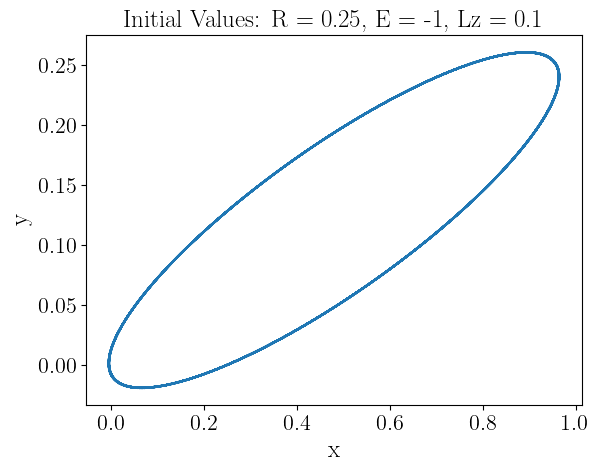

In [6]:
test_ellipse("0.25_-1_0.1_.dat")

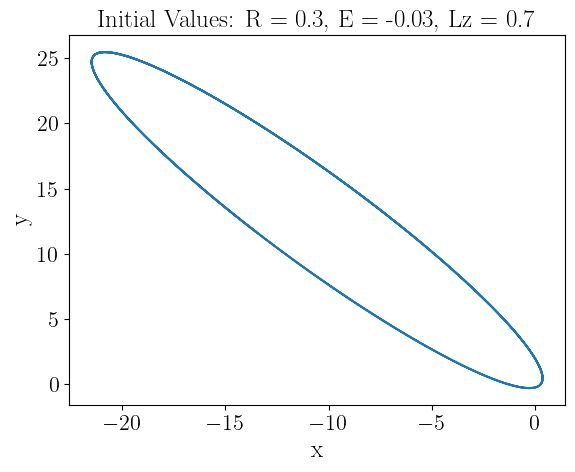

In [7]:
test_ellipse("0.3_-0.03_0.7_.dat")

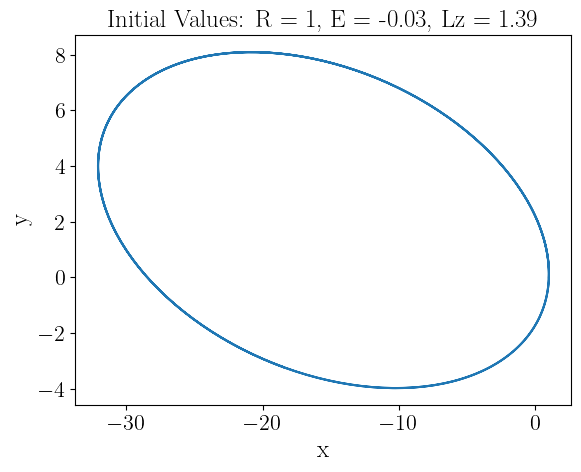

In [8]:
test_ellipse("1_-0.03_1.39_.dat")

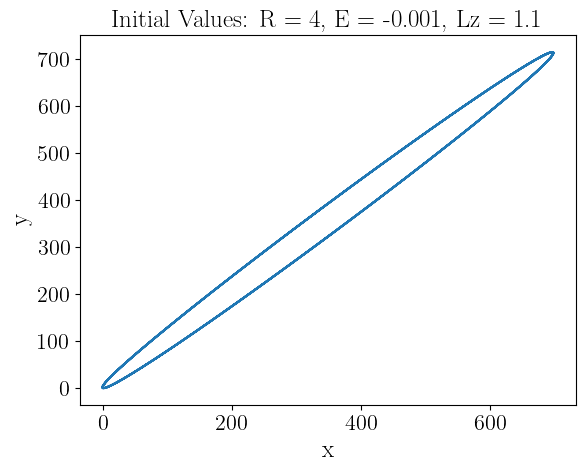

In [9]:
test_ellipse("4_-0.001_1.1_.dat")

# Part 2

2 am perihelion advance thoughts: Find minima in r(t) @ t_min, add theta_new to orbit.dat, define prec to be phi(t_min,i+1) - phi(t_min,i), report avg value.

In [10]:
import pandas as pd

In [11]:
r_phi_names = ["var", "iter", "t", "norbit", "value", "ang_freq"]
df_005 = pd.read_csv("kappa/0.05.dat", sep=" ", header=None)
df_005.columns = r_phi_names

In [12]:
df_005_r = df_005[df_005["var"] == "rad:"]
df_005_phi = df_005[df_005["var"] == "phi:"]

In [13]:
df_005_r["ang_freq"].mean()

0.5726120000000001

In [14]:
df_005_phi["ang_freq"].mean()

0.5303295833333334

In [15]:
# Find perihelion prec
min_idxs = np.array(df_005_r["iter"])
min_idxs

array([ 73740, 147480, 221219, 294959, 368699, 442439, 516179, 589919,
       663658, 737398, 811138, 884878, 958618])

In [16]:
# Indices 0:t 1-3:x 4-6:v 7:E 8-10:L 11:r 12:|L| 13:omega? 14:eccen 15-17:evect 18:phase
# out2 0:rcyl 1:vcyl

In [17]:
kappa_arr = np.loadtxt("kappa/0.050000_orbit.dat").T
phi_prec = kappa_arr[19][min_idxs // 100]
phi_prec

array([ 5.76341, 11.5268 , 17.3012 , 23.0647 , 28.8281 , 34.6025 ,
       40.3659 , 46.1403 , 51.9037 , 57.6671 , 63.4416 , 69.205  ,
       74.9794 ])

In [18]:
np.mean(np.diff(phi_prec))

5.767999166666667

In [19]:
def get_kappa_data(kappa):
    r_phi_names = ["var", "iter", "t", "norbit", "value", "ang_freq"]
    df_f = pd.read_csv("kappa/{}.dat".format(kappa), sep=" ", header=None)
    df_f.columns = r_phi_names
    df_r = df_f[df_f["var"] == "rad:"]
    df_phi = df_f[df_f["var"] == "phi:"]
    
    omega_r = df_r["ang_freq"].mean()
    omega_phi = df_phi["ang_freq"].mean()

    min_idxs = np.array(df_r["iter"])

    orbit_arr = np.loadtxt("kappa/{:.6f}_orbit.dat".format(kappa)).T
    phi_prec = orbit_arr[19][min_idxs // 100]

    peri_prec = np.mean(np.diff(phi_prec)) - (2 * np.pi)

    return np.array([omega_r, omega_phi, peri_prec])

In [20]:
kappa_range = [-0.15, -0.1, -0.05, 0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
kappa_plots = np.zeros(shape=(len(kappa_range),3))
for ii, kk in enumerate(kappa_range):
    kappa_plots[ii] = get_kappa_data(kk)
kappa_plots = kappa_plots.T

/home/acwen/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/acwen/.local/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


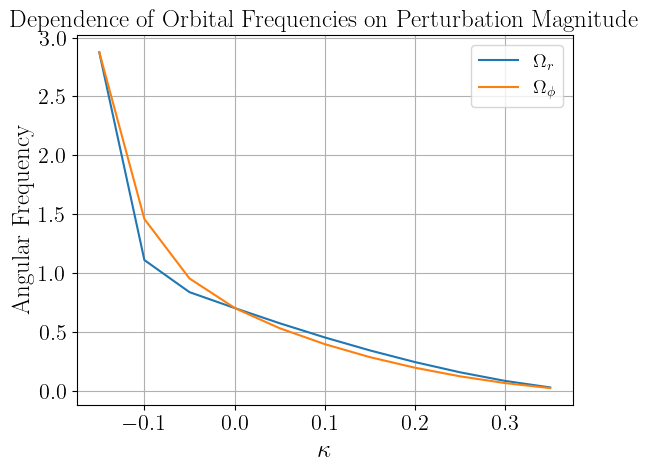

In [21]:
plt.plot(kappa_range, kappa_plots[0], label=r"$\Omega_r$")
plt.plot(kappa_range, kappa_plots[1], label=r"$\Omega_{\phi}$")
plt.legend()
plt.xlabel(r"$\kappa$")
plt.ylabel("Angular Frequency")
plt.title("Dependence of Orbital Frequencies on Perturbation Magnitude")
plt.grid()
plt.show()

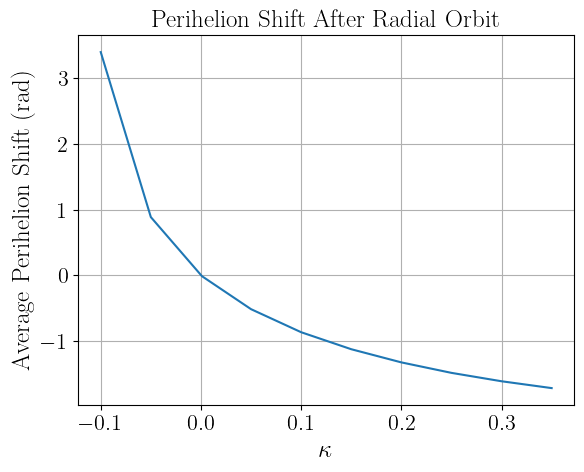

In [22]:
plt.plot(kappa_range, kappa_plots[2])
plt.xlabel(r"$\kappa$")
plt.ylabel("Average Perihelion Shift (rad)")
plt.title("Perihelion Shift After Radial Orbit")
plt.grid()
plt.show()

# Part 3

In [58]:
def get_period_data(name, alpha):
    r_phi_names = ["var", "iter", "t", "norbit", "value", "ang_freq"]
    df_f = pd.read_csv("powerlaw/r_phi_{}_{}.dat".format(name, alpha), sep=" ", header=None)
    df_f.columns = r_phi_names
    df_r = df_f[df_f["var"] == "rad:"]
    df_phi = df_f[df_f["var"] == "phi:"]
    
    omega_r = df_r["ang_freq"].loc[1:].mean()
    omega_phi = df_phi["ang_freq"].loc[1:].mean()

    return omega_phi / omega_r, 1 / np.sqrt(2 + alpha), 0.5, 1 / (2 + alpha)

In [59]:
get_period_data("circ", -1)

(0.9169144774358077, 1.0, 0.5, 1.0)

In [60]:
get_period_data("circ", 1)

(0.5529227600770692, 0.5773502691896258, 0.5, 0.3333333333333333)

In [61]:
get_period_data("circ", 2)

(0.4921250727935003, 0.5, 0.5, 0.25)

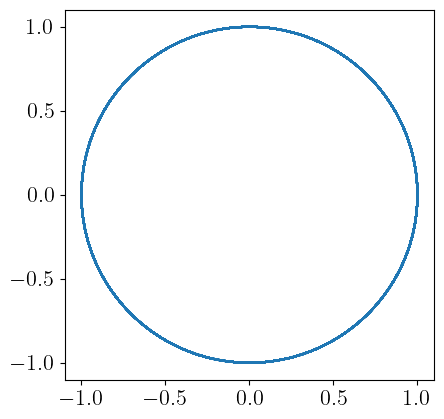

In [62]:
circ_orbit  = np.loadtxt("powerlaw/circ_2_orbit.dat").T
fig, ax = plt.subplots()
ax.set_box_aspect(1)
plt.plot(circ_orbit[1], circ_orbit[2])
#plt.xlim(0, 1)
#plt.ylim(-0.5, 0.5)

In [63]:
get_period_data("neg", -1)

(0.9332849480097527, 1.0, 0.5, 1.0)

In [64]:
get_period_data("neg", -0.6)

(0.7121948206451061, 0.8451542547285166, 0.5, 0.7142857142857143)

In [65]:
get_period_data("neg", -0.2)

(0.6038831885770433, 0.7453559924999299, 0.5, 0.5555555555555556)

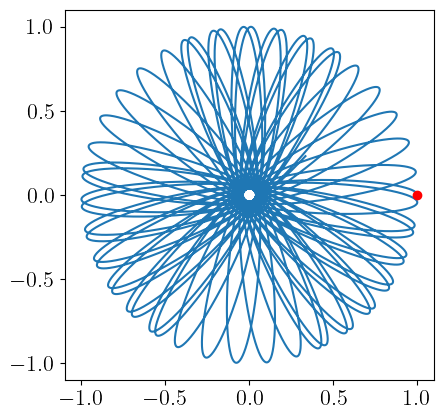

In [66]:
circ_orbit  = np.loadtxt("powerlaw/neg_-0.2_orbit.dat").T
fig, ax = plt.subplots()
ax.set_box_aspect(1)
plt.plot(circ_orbit[1], circ_orbit[2])
plt.plot(circ_orbit[1][0], circ_orbit[2][0], 'ro')

In [70]:
get_period_data("pos", 0.6)

(0.5151120666749474, 0.6201736729460422, 0.5, 0.3846153846153846)

In [71]:
get_period_data("pos", 1.2)

(0.4851802336914346, 0.5590169943749475, 0.5, 0.3125)

In [72]:
get_period_data("pos", 1.8)

(0.4674876758894548, 0.5129891760425771, 0.5, 0.2631578947368421)